In [76]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Salary_Data.csv")#https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [121]:
df=df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

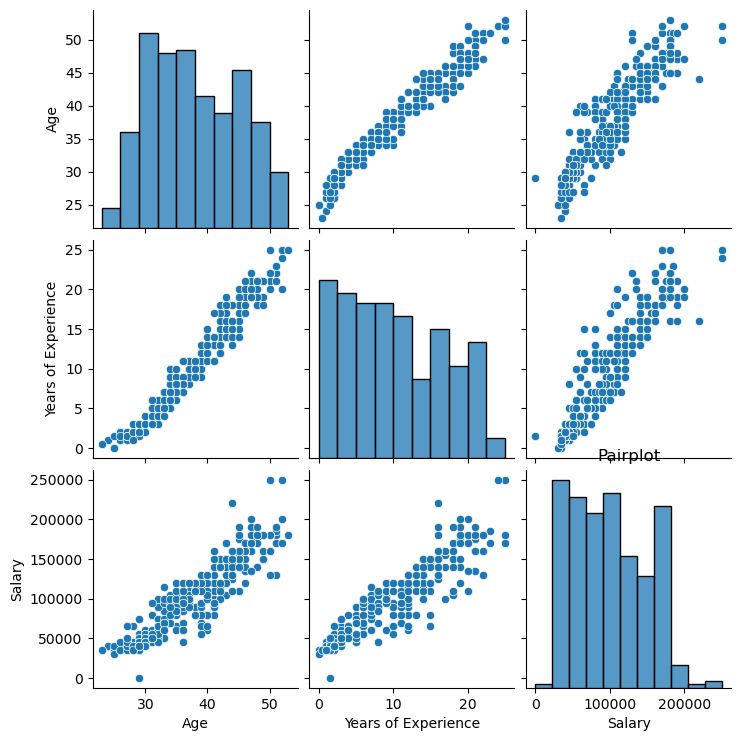

In [149]:
sns.pairplot(df)
plt.title("Pairplot")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_2560\4048287120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


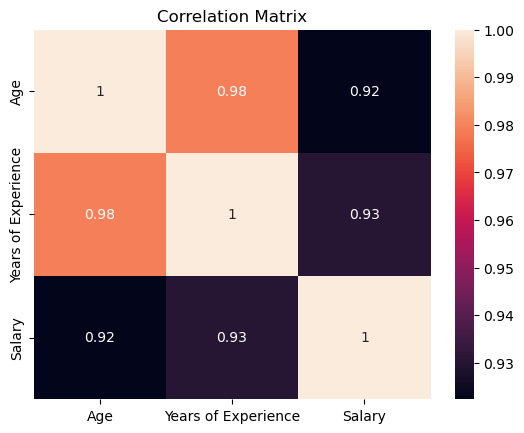

In [142]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

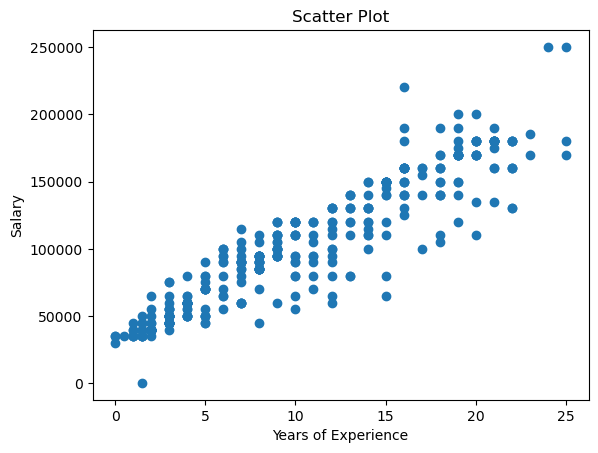

In [132]:
#Scatter Plots
y=df["Salary"]
x=df["Years of Experience"]
plt.scatter(x,y)
plt.title("Scatter Plot")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

### Mathematically

Coefficients:
	Slope m = 6844.51
	Intercept c = 31921.22

Linear Equation:  
	Y = 6844.51x + 31921.22


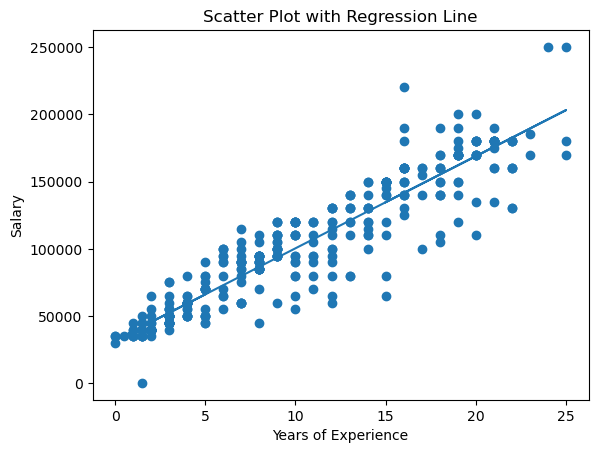

In [158]:
import numpy as np
#y=mx+c
#c=mean(y)-m*mean(x)
#m=mean(xy)-mean(x)*mean(y)/mean(x^2)-mean(x)^2
y=y.tolist() if type(y)!=list else y
x= x.tolist() if type(x)!=list else x
def linear_regresssion(x,y):
    xy=[x[i]*y[i] for i in range(len(x))]
    x2=[xq*xq for xq in x]
    m=np.mean(xy)-np.mean(x)*np.mean(y)
    m=m/(np.mean(x2)-np.mean(x)*np.mean(x))
    c=np.mean(y)-m*np.mean(x)
    return m,c
m,c=linear_regresssion(x,y)
print(f"Coefficients:\n\tSlope m = {m:.2f}\n\tIntercept c = {c:.2f}\n\nLinear Equation:  \n\tY = {m:.2f}x + {c:.2f}")
def myfunc(x):
  return m * x + c

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y, mymodel)
mse = mean_squared_error(y, mymodel)
r2 = r2_score(y, mymodel)

print("Metrics Values for Mathematical Model:")
print("\tMean Absolute Error  :", round(mae,2))
print("\tMean Squared Error   :", round(mse,2))
print("\tR-squared (R²) Score :", round(r2,2))

Metrics Values for Mathematical Model:
	Mean Absolute Error  : 12574.74
	Mean Squared Error   : 312090043.8
	R-squared (R²) Score : 0.87


### Using Inbuilt model

In [162]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [174]:
x1=np.array(x).reshape(len(x),-1)

X_train, X_test, y_train, y_test = train_test_split(x1, np.array(y), test_size = 0.25,random_state=42) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print("R-squared (R²) Score :",regr.score(X_test, y_test)) 

R-squared (R²) Score : 0.8577897480293204


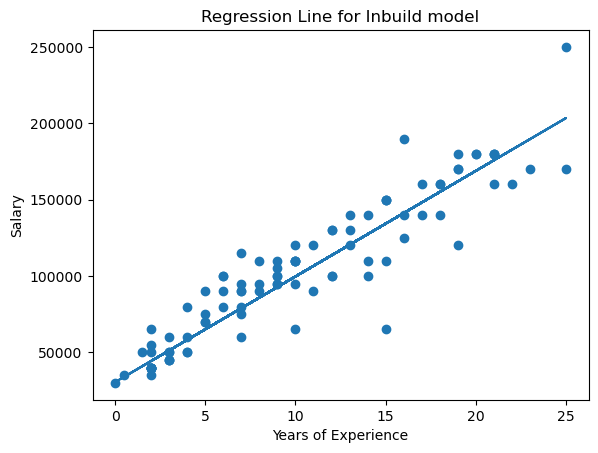

In [176]:
y_pred = regr.predict(X_test) 

plt.scatter(X_test, y_test) 
plt.plot(X_test, y_pred)
plt.title("Regression Line for Inbuild model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show() 

In [181]:
mae1 = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse1 = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
rmse1 = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("Metrics Values for Inbuilt Model:")
print("\tMean Absolute Error     :", round(mae1,2))
print("\tMean Squared Error      :", round(mse1,2))
print("\tRoot Mean Squared Error :", round(rmse1,2))

Metrics Values for Inbuilt Model:
	Mean Absolute Error     : 13266.08
	Mean Squared Error      : 310110811.71
	Root Mean Squared Error : 17609.96
